# ML model to predict Rent price for real state units in UAE 

## Import Libraries

In [23]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## import dataset

In [3]:
df = pd.read_csv("dubai_properties.csv")

In [4]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


## prepare and Visualize the data

In [5]:
df["Rent"]= df["Rent"].div(1000)

In [6]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124.0,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140.0,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99.0,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220.0,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350.0,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [7]:
df['Posted_date'] = pd.to_datetime(df['Posted_date'],format='%Y-%m-%d')

In [8]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124.0,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140.0,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99.0,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220.0,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350.0,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [9]:
df.dropna(inplace= True)
df.drop_duplicates(inplace= True)

In [10]:
df.drop(['Address','Latitude','Longitude','Rent_category','Frequency','Purpose'], axis = 1, inplace= True)

In [11]:
df['Year'] = df['Posted_date'].dt.year

In [12]:
df['Year'].unique()

array([2024, 2023, 2022, 2020, 2021, 2019, 2018])

## Aplly descriptive statistics

In [33]:
df.describe()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Posted_date,Age_of_listing_in_days,Year
count,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,73023,73023.000000,73023.000000
mean,148.372314,2.154458,2.638771,2035.634471,88.537296,2024-02-07 02:45:58.900620544,73.884735,2023.801364
min,0.000000,0.000000,1.000000,74.000000,0.000000,2018-01-27 00:00:00,11.000000,2018.000000
25%,54.999000,1.000000,2.000000,850.000000,40.000000,2024-01-17 00:00:00,30.000000,2024.000000
50%,98.000000,2.000000,2.000000,1329.000000,71.813285,2024-03-01 00:00:00,51.000000,2024.000000
75%,170.000000,3.000000,3.000000,2101.000000,119.047619,2024-03-22 00:00:00,95.000000,2024.000000
max,55000.000000,12.000000,11.000000,210254.000000,2182.044888,2024-04-10 00:00:00,2276.000000,2024.000000
std,308.265238,1.571260,1.620881,2976.159891,66.627532,NaN,71.837749,0.412245


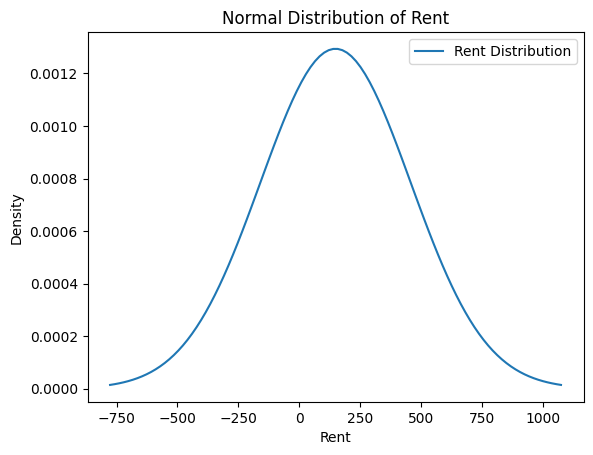

In [13]:
rent_mean = df['Rent'].mean()
rent_std = df['Rent'].std()
# By using mean ± 3 * std we capture 99.7% of data 
x_values = np.linspace(rent_mean - 3 * rent_std, rent_mean + 3 * rent_std, 100)
pdf_values = norm.pdf(x_values, rent_mean, rent_std)
plt.plot(x_values, pdf_values, label='Rent Distribution')
plt.xlabel('Rent')
plt.ylabel('Density')
plt.title('Normal Distribution of Rent')
plt.legend()
plt.show()

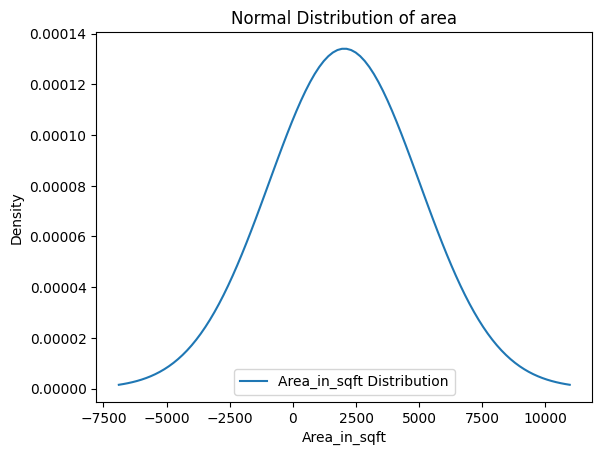

In [14]:
rent_mean = df['Area_in_sqft'].mean()
rent_std = df['Area_in_sqft'].std()
x_values = np.linspace(rent_mean - 3 * rent_std, rent_mean + 3 * rent_std, 100)
pdf_values = norm.pdf(x_values, rent_mean, rent_std)
plt.plot(x_values, pdf_values, label='Area_in_sqft Distribution')
plt.xlabel('Area_in_sqft')
plt.ylabel('Density')
plt.title('Normal Distribution of area')
plt.legend()
plt.show()

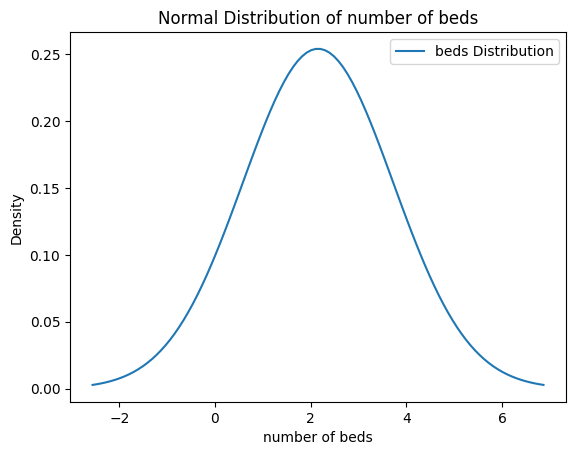

In [15]:
rent_mean = df['Beds'].mean()
rent_std = df['Beds'].std()
x_values = np.linspace(rent_mean - 3 * rent_std, rent_mean + 3 * rent_std, 100)
pdf_values = norm.pdf(x_values, rent_mean, rent_std)
plt.plot(x_values, pdf_values, label='beds Distribution')
plt.xlabel('number of beds')
plt.ylabel('Density')
plt.title('Normal Distribution of number of beds')
plt.legend()
plt.show()

## the data have bad normal distribution

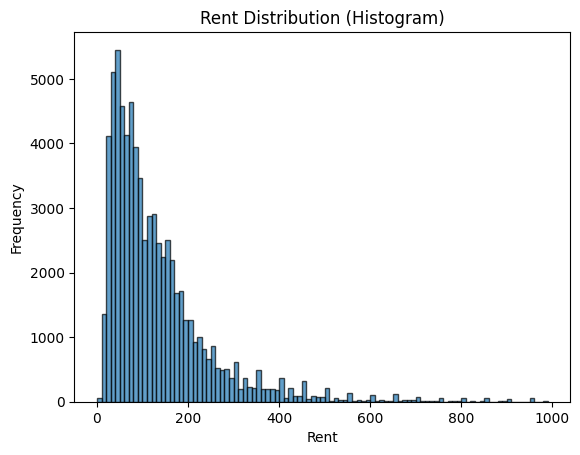

In [16]:
bins = np.arange(0, 100 * 10, 10)
rent = df["Rent"].to_numpy()
plt.hist(rent, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Rent Distribution (Histogram)')
plt.show()

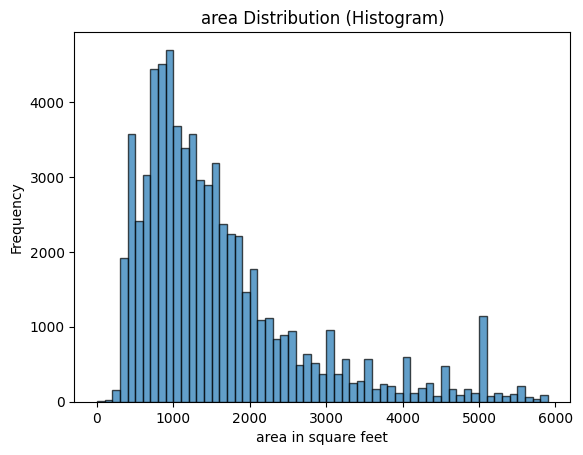

In [18]:
bins = np.arange(0, 30 * 200, 100)
area = df['Area_in_sqft'].to_numpy()
plt.hist(area, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('area in square feet')
plt.ylabel('Frequency')
plt.title('area Distribution (Histogram)')
plt.show()

## the data is right skewed

In [19]:
df_type = df.groupby('Type')

In [20]:
df_year = df.groupby('Year')

In [21]:
df_beds = df.groupby('Beds')

In [22]:
df_bath = df.groupby('Baths')

In [23]:
type = df['Type'].unique()
len(type)

9

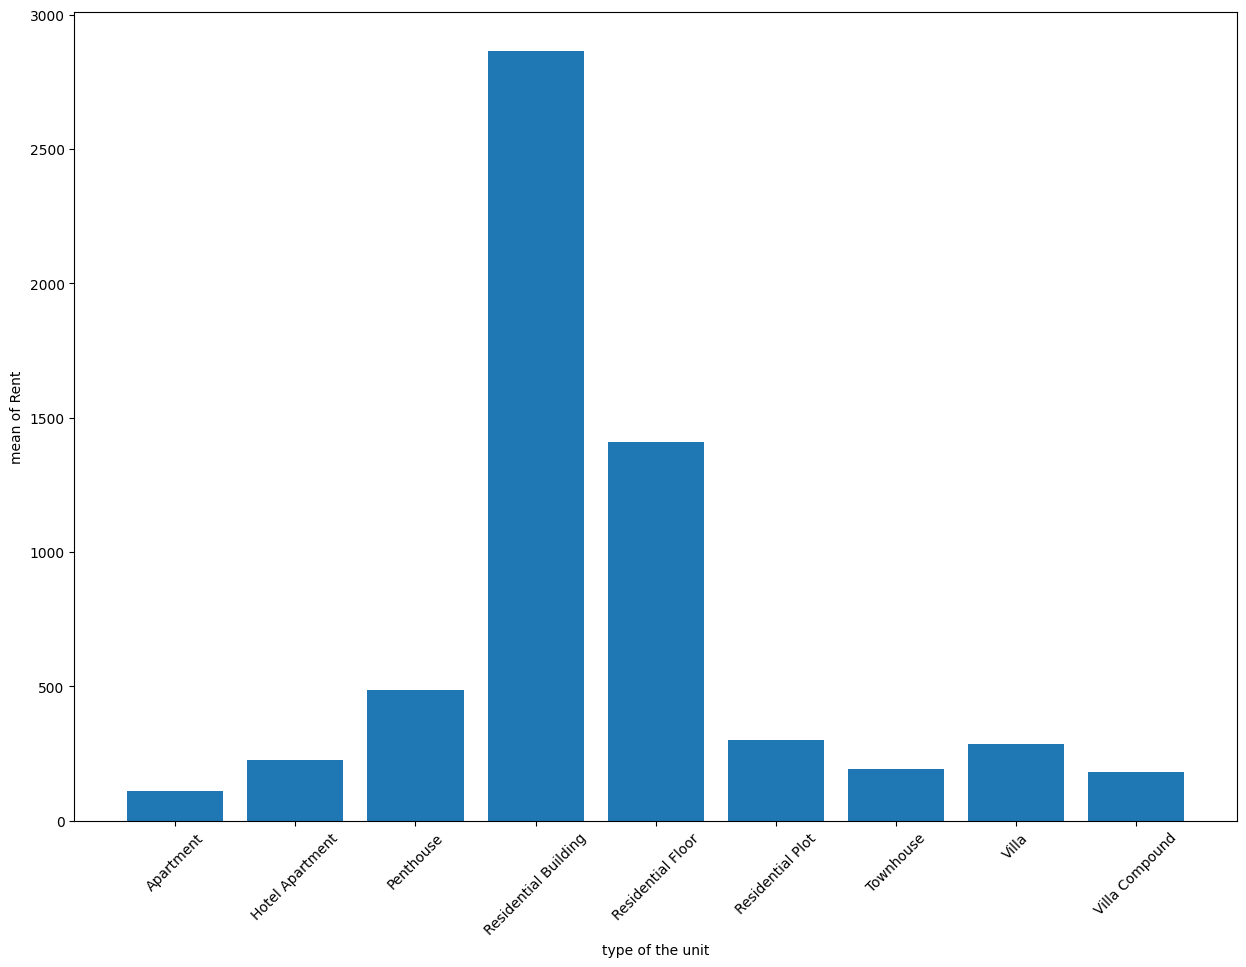

In [24]:
type = df_type["Rent"].mean().index.values
rent_mean = df_type["Rent"].mean().to_numpy()
fig = plt.figure(figsize =(10*1.5, 7*1.5))
plt.bar(type, rent_mean)
plt.xticks(rotation=45)
plt.xlabel('type of the unit')
plt.ylabel('mean of Rent')
plt.show()

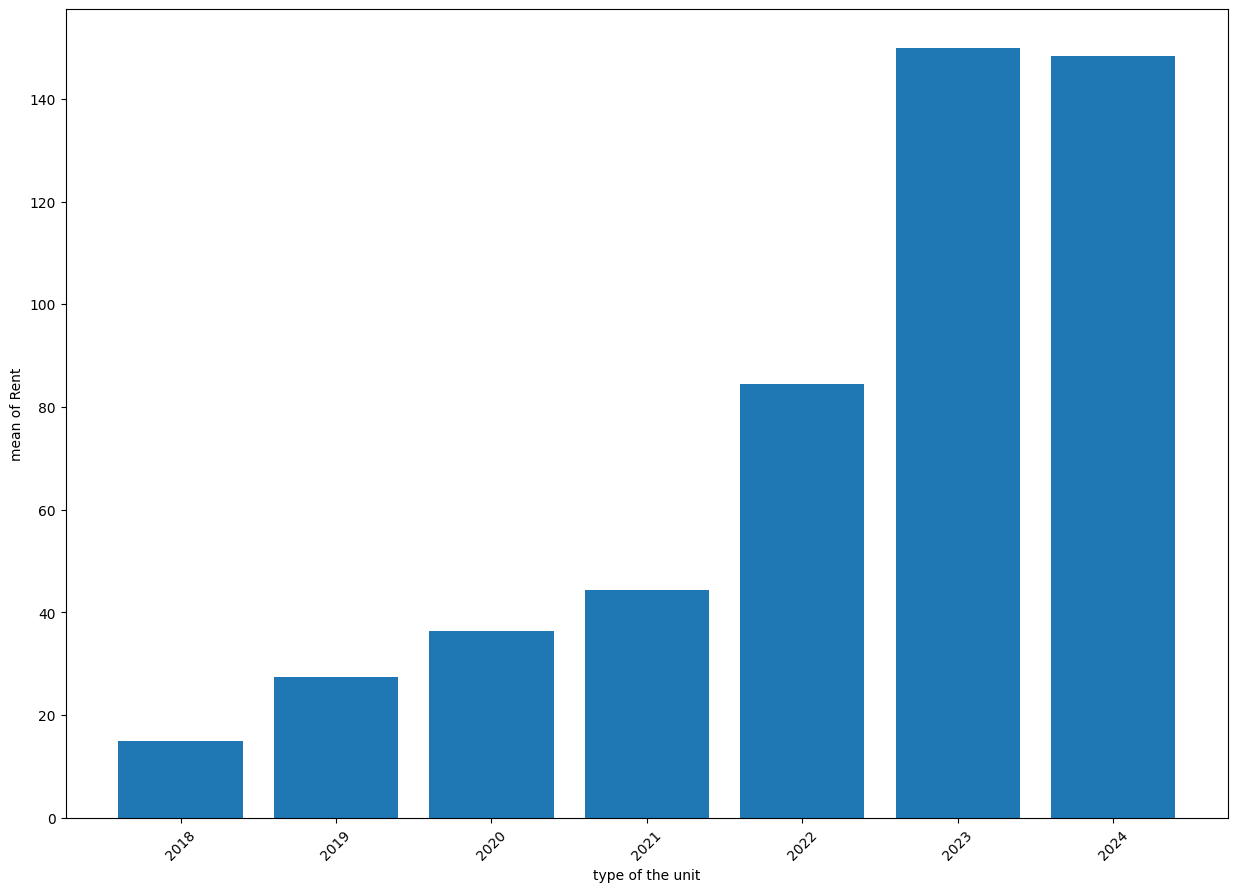

In [25]:
type = df_year["Rent"].mean().index.values
rent_mean = df_year["Rent"].mean().to_numpy()
fig = plt.figure(figsize =(10*1.5, 7*1.5))
plt.bar(type, rent_mean)
plt.xticks(rotation=45)
plt.xlabel('type of the unit')
plt.ylabel('mean of Rent')
plt.show()

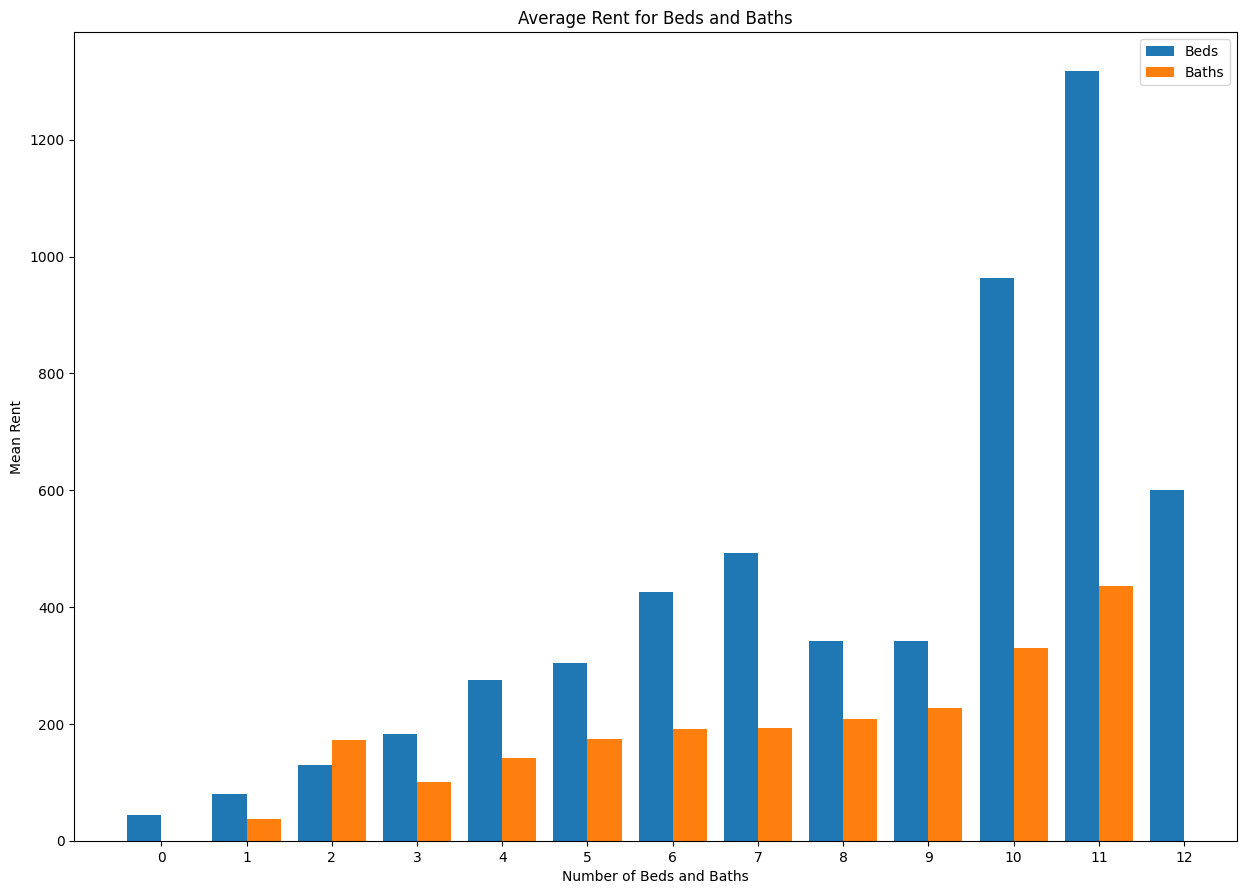

In [26]:
beds = df_beds["Rent"].mean().index.values
rent_mean_beds = df_beds["Rent"].mean().to_numpy()
bath = df_bath["Rent"].mean().index.values
rent_mean_bath = df_bath["Rent"].mean().to_numpy()
fig, ax = plt.subplots(figsize=(10*1.5, 7*1.5))
ax.bar(beds - 0.2, rent_mean_beds, width=0.4, label='Beds')
ax.bar(bath + 0.2, rent_mean_bath, width=0.4, label='Baths')
plt.xticks(np.arange(len(beds)), beds)
plt.xlabel('Number of Beds and Baths')
plt.ylabel('Mean Rent')
plt.title('Average Rent for Beds and Baths')
plt.legend()
plt.show()


In [27]:
df

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,Posted_date,Age_of_listing_in_days,Location,City,Year
0,124.0,3,4,Apartment,1785,69.467787,Unfurnished,2024-03-07,45,Al Reem Island,Abu Dhabi,2024
1,140.0,3,4,Apartment,1422,98.452883,Unfurnished,2024-03-08,44,Yas Island,Abu Dhabi,2024
2,99.0,2,3,Apartment,1314,75.342466,Furnished,2024-03-21,31,Al Raha Beach,Abu Dhabi,2024
3,220.0,3,4,Penthouse,3843,57.246942,Unfurnished,2024-02-24,57,Al Reem Island,Abu Dhabi,2024
4,350.0,5,7,Villa,6860,51.020408,Unfurnished,2024-02-16,65,Yas Island,Abu Dhabi,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
73729,10.0,0,1,Apartment,249,40.160643,Unfurnished,2023-12-09,134,Al Salamah,Umm Al Quwain,2023
73734,25.0,1,1,Villa,500,50.000000,Unfurnished,2023-12-01,142,Al Ramlah,Umm Al Quwain,2023
73735,22.0,2,2,Apartment,1000,22.000000,Unfurnished,2024-03-26,26,Umm Al Quwain Marina,Umm Al Quwain,2024
73737,14.0,0,1,Apartment,419,33.412888,Unfurnished,2023-12-14,129,Al Salamah,Umm Al Quwain,2023


In [28]:
df_encoded = pd.get_dummies(df,columns=["Type","Furnishing","Location","City","Year"])
df.drop(columns=["Type","Furnishing","Location","City","Year"], inplace=True)
bool_columns = df_encoded.select_dtypes(include=bool).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)
df = df_encoded

In [29]:
df['Posted_date'] = df['Posted_date'].astype('int64') // 10**9

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73023 entries, 0 to 73738
Columns: 392 entries, Rent to Year_2024
dtypes: float64(2), int32(385), int64(5)
memory usage: 111.7 MB


In [31]:
df.head()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Posted_date,Age_of_listing_in_days,Type_Apartment,Type_Hotel Apartment,Type_Penthouse,...,City_Ras Al Khaimah,City_Sharjah,City_Umm Al Quwain,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
0,124.0,3,4,1785,69.467787,1709769600,45,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,140.0,3,4,1422,98.452883,1709856000,44,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,99.0,2,3,1314,75.342466,1710979200,31,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,220.0,3,4,3843,57.246942,1708732800,57,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,350.0,5,7,6860,51.020408,1708041600,65,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df.head()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Posted_date,Age_of_listing_in_days,Type_Apartment,Type_Hotel Apartment,Type_Penthouse,...,City_Ras Al Khaimah,City_Sharjah,City_Umm Al Quwain,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
0,124.0,3,4,1785,69.467787,1709769600,45,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,140.0,3,4,1422,98.452883,1709856000,44,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,99.0,2,3,1314,75.342466,1710979200,31,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,220.0,3,4,3843,57.246942,1708732800,57,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,350.0,5,7,6860,51.020408,1708041600,65,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
x = df.drop('Rent', axis=1)
y = df['Rent']

In [34]:
x.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Posted_date,Age_of_listing_in_days,Type_Apartment,Type_Hotel Apartment,Type_Penthouse,Type_Residential Building,...,City_Ras Al Khaimah,City_Sharjah,City_Umm Al Quwain,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
0,3,4,1785,69.467787,1709769600,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,4,1422,98.452883,1709856000,44,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,3,1314,75.342466,1710979200,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,4,3843,57.246942,1708732800,57,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,7,6860,51.020408,1708041600,65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
y.head()

0    124.0
1    140.0
2     99.0
3    220.0
4    350.0
Name: Rent, dtype: float64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## linear regression

In [37]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.44409242231791823, 0.4737791816888217)

In [38]:
"""
hp_candidates = {
    'n_neighbors': [8, 9, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 5]
}
"""

In [ ]:
"""
grid = GridSearchCV(estimator=KNeighborsRegressor(),
                    param_grid=hp_candidates,
                    cv=5,  # Use appropriate cross-validation strategy
                    scoring='neg_mean_squared_error',
                    verbose=1,
                    return_train_score=True)
grid.fit(x_train, y_train)
"""

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
"""
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
"""

## Random forest

In [95]:
random_forest = RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', n_jobs = -1,ccp_alpha=0.1,)
random_forest.fit(x_train, y_train.values.ravel())
print(random_forest.score(x_train, y_train), random_forest.score(x_test, y_test))

0.9249802345082644 0.8272473426294896


## Decision tree

In [108]:
dtr = DecisionTreeRegressor(random_state=0, max_depth=1000, min_samples_split = 18, min_impurity_decrease = 1.4)
dtr.fit(x_train, y_train.values.ravel())
dtr.score(x_train,y_train), dtr.score(x_test,y_test)

(0.6501191443268182, 0.6663238008313754)

## Extra Trees

In [110]:
etr = ExtraTreesRegressor(random_state=0, n_estimators = 250, max_features = None,n_jobs=-1)
etr.fit(x_train, y_train.values.ravel())
etr.score(x_train,y_train), etr.score(x_test,y_test)

(0.9999999994181372, 0.9713726275265521)

## extra tree regression have the best prediction

In [34]:
def predict(model,x):
    y = model.predict(x)
    return y